In [135]:
import pandas as pd
import numpy as np

In [136]:
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] #softmax 출력값
t = [0,0,1,0,0,0,0,0,0,0] #원핫인코딩

def sse(y,t):
    return 0.5*np.sum((y - t)**2)

In [137]:
y1 = np.array(y1)
y2 = np.array(y2)
t = np.array(t)

In [138]:
print(sse(y1,t),sse(y2,t))

0.09750000000000003 0.5975


Cross Entropy Error

In [139]:
def cee(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

print(cee(y1,t),cee(y2,t))

0.510825457099338 2.302584092994546


MNIST - minibatch

In [140]:
import sys, os
sys.path.append(os.pardir) #부모 디렉터리 파일 갖고오도록 설정
from dataset.mnist import load_mnist #dataset이 부모 디렉토리 아래에 있도록

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

In [141]:
print(x_train.shape, t_train.shape)

(60000, 784) (60000, 10)


무작위로 batch 만들기

In [142]:
train_size = x_train.shape[0] #60000개의 data
batch_size = 10 #10개 data만 미니배치로

#무작위로 10개 고르기
batch_mask = np.random.choice(train_size, batch_size) 


x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [143]:
print(x_batch.shape, t_batch.shape)

(10, 784) (10, 10)


미니배치에서 CEE

In [144]:
#label : one-hot-encoding

def batch_cee(y,t):
    if y.ndim == 1: #데이터가 하나인 경우 
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size) 
        
    batch_size = y.shape[0] #배치 크기는 y의 데이터 갯수
    return -np.sum(t*np.log(y+1e-7))/batch_size 
    #cee 계산, 이때 평균이므로 마지막에 배치크기로 나눠줌


In [145]:
#label : just [2]

def batch_cee(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size),t]+1e-7))/batch_size

### 3. 수치 미분

In [146]:
def numerical_diff(f,x):
    h = 1e-4 #0.0001
    return (f(x+h)-f(x-h))/(2*h)

In [147]:
#예시함수
def function_1(x):
    return 0.01*x**2 + 0.1*x

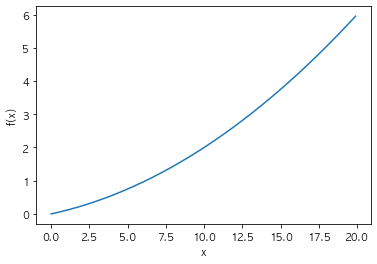

In [148]:
#위 함수 그리기
import numpy as np
import matplotlib.pylab as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus']=False

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()


In [149]:
#x=5, x=10에서 미분 계산
numerical_diff(function_1,5)

0.1999999999990898

In [150]:
numerical_diff(function_1,10)

0.2999999999986347

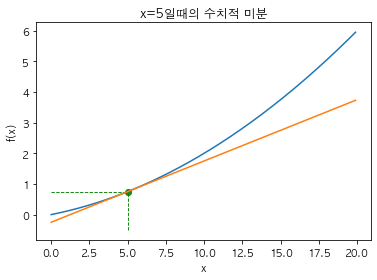

In [151]:
#위에서 구한 수치 미분을 기울기로 하는 직선 그리기

## x=5일때
x = np.arange(0.0,20.0, 0.1)
y = function_1(x)

dx_5 = numerical_diff(function_1,5)
l_5 = dx_5*(x-5) + function_1(5)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('x=5일때의 수치적 미분')
plt.plot(x,y)
plt.plot(x,l_5)
plt.hlines(function_1(5),0,5,'green',ls='--',lw=0.9)
plt.vlines(5,-0.5,function_1(5),'green',ls='--',lw=0.9)
plt.scatter(5,function_1(5),color='green', alpha=0.9)
plt.show()

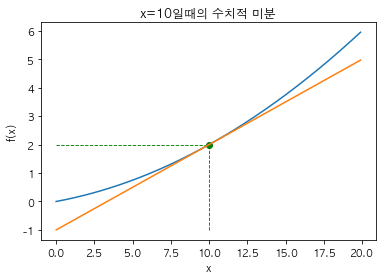

In [152]:
## x=10일때

x = np.arange(0.0,20.0, 0.1)
y = function_1(x)

dx_10 = numerical_diff(function_1,10)
l_10 = dx_10*(x-10) + function_1(10)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('x=10일때의 수치적 미분')
plt.plot(x,y)
plt.plot(x,l_10)
plt.hlines(function_1(10),0,10,'green',ls='--',lw=0.9)
plt.vlines(10,-1,function_1(10),'green',ls='--',lw=0.9)
plt.scatter(10,function_1(10),color='green')
plt.show()

수치 미분 vs 해석적 미분 : 극단적인 경우

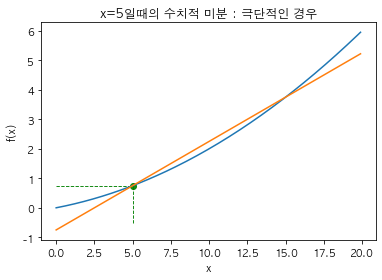

In [153]:
def numerical_diff_1(f,x):
    h = 10 #h값이 터무니없이 큰 경우... >_<
    y=(f(x+h)-f(x))/h
    return y

#위에서 구한 수치 미분(극단적 경우)을 기울기로 하는 직선 그리기

## x=5일때
x = np.arange(0.0,20.0, 0.1)
y = function_1(x)

dx_5 = numerical_diff_1(function_1,5)
l_5 = dx_5*(x-5) + function_1(5)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('x=5일때의 수치적 미분 : 극단적인 경우')
plt.plot(x,y)
plt.plot(x,l_5)
plt.hlines(function_1(5),0,5,'green',ls='--',lw=0.9)
plt.vlines(5,-0.5,function_1(5),'green',ls='--',lw=0.9)
plt.scatter(5,function_1(5),color='green', alpha=0.9)
plt.show()

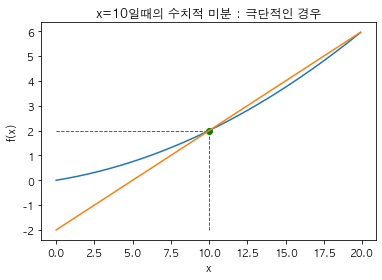

In [155]:
## x=10일때

x = np.arange(0.0,20.0, 0.1)
y = function_1(x)

dx_10 = numerical_diff_1(function_1,10)
l_10 = dx_10*(x-10) + function_1(10)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('x=10일때의 수치적 미분 : 극단적인 경우')
plt.plot(x,y)
plt.plot(x,l_10)
plt.hlines(function_1(10),0,10,'green',ls='--',lw=0.9)
plt.vlines(10,-2,function_1(10),'green',ls='--',lw=0.9)
plt.scatter(10,function_1(10),color='green')
plt.show()

직선의 기울기는 해석적 미분으로 해야 가장 정확하지만, h=0.0001 (1e-4) 사용하면 나름 정확하게 얻을 수 있다. 위와같은 극단적인 경우를 방지하기 위해 수치미분을 제대로 하는것이 중요!

#### 편미분

In [156]:
def function_2(x):
    y=x[0]**2+x[1]**2
    return y

In [201]:
def function_tmp1(x0):
    return x0*x0 + 4**2
numerical_diff(function_tmp1,3)

6.00000000000378

### gradient : 모든 변수의 편미분을 벡터로 정리한 것

In [206]:
def numerical_gradient(f,x):
    h = 1e-3
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val+h
        f_xh1 = f(x)
        
        x[idx] = tmp_val-h
        f_xh2 = f(x)
        
        grad[idx] = (f_xh1-f_xh2) / (2*h)
        x[idx] = tmp_val #값을 복원
        
    return grad

In [207]:
numerical_gradient(function_2, np.array([3.0,4.0]))

array([6., 8.])

In [210]:
#시각화
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

No handles with labels found to put in legend.


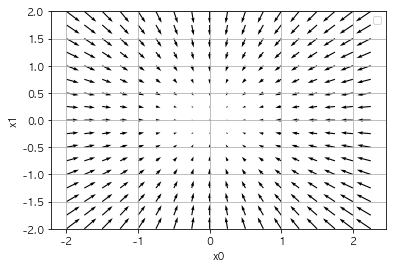

In [214]:
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy")
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

경사 하강법

In [302]:
def gradient_descent(f,init_x,lr,step_num):
    x = init_x
    
    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x -= lr*grad
    return x

In [303]:
def function_2(x):
    
    return x[0]**2 + x[1]**2

In [304]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [305]:
#학습률이 너무 큰 경우 : 발산해버린다.
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [306]:
#학습률이 너무 작은 경우 : 적절값까지 가지 못한 채 끝나버린다.
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

# 신경망에서 학습 알고리즘 구현

In [314]:
#functions.py 내에 저장된 함수들
import numpy as np


def identity_function(x):
    return x


def step_function(x):
    return np.array(x > 0, dtype=np.int)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
    

def relu(x):
    return np.maximum(0, x)


def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad
    

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))


def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)


In [316]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size,output_size,
                weight_init_std=0.01):
        #weight 초기화
        self.params = {}
        self.params['W1'] = weight_init_std *\
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*\
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self,x):
        W1,W2 = self.params['W1'], self.params['W2']
        b1,b2 = self.params['b1'], self.params['b2']
        
        #신경망
        a1 = np.dot(x,W1)+b1 #행렬곱
        z1 = sigmoid(a1) #시그모이드 함수로 비선형변환
        a2 = np.dot(z1,W2)+b2 #다시 행렬곱
        y = softmax(a2) #소프트맥스 함수로 비선형변환
        
        return y
    
    #x : input, t : label
    def loss(self, x, t):
        y=self.predict(x)
        return cross_entropy_error(y,t)
    
    def accuracy(self,x,t):
        y=self.predict(x)
        y=np.argmax(y,axis=1)
        t=np.argmax(t,axis=1)
        
        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self,x,t):
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W,self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W,self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W,self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W,self.params['b2'])
        
        return grads
        

In [327]:
net = TwoLayerNet(input_size = 784, hidden_size=100, output_size=10)
print(net.params['W1'].shape,
      net.params['b1'].shape,
      net.params['W2'].shape, 
      net.params['b2'].shape)

(784, 100) (100,) (100, 10) (10,)


In [339]:
#예측 실행


x=np.random.rand(100,784) #100장의 더미 입력데이터
y=net.predict(x)
t=np.random.rand(100,10) #100장의 더미 레이블

grads = net.numerical_gradient(x,t)

In [352]:
grads['W1'].mean()

1.2745964890311589e-05

In [353]:
grads['W2'].mean()

1.4785950241957835e-11

In [354]:
grads['b1'].mean()

2.536395649066492e-05

In [355]:
grads['b2'].mean()

1.1968204205459188e-10

In [360]:
grads['W1'].mean()

1.2745964890311589e-05

# 신경망 : 미니배치 사용해 구현하기

In [371]:
import sys, os
sys.path.append(os.pardir)

In [377]:
from dataset.mnist import load_mnist

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads



In [379]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list=[]

#hyper parameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    #minibatch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #gradient
    grad = network.numerical_gradient(x_batch, t_batch)
    
    #parameter update
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]
        
    #학습 결과를 위 train_loss_list에 기록
    loss=network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

KeyboardInterrupt: 

In [ ]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)


train_loss_list = []
train_acc_list = []
test_acc_list = []

#1epoch 당 반복 수
iter_per_epoch = max(train_size / batch_size , 1)

#hyper parameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    #minibatch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #gradient
    grad = network.numerical_gradient(x_batch, t_batch)
    
    #parameter update
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]
        
    #학습 결과를 위 train_loss_list에 기록
    loss=network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i% iter_per_epoch == 0: 
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc : ' + str(train_acc) +
              ',' + str(test_acc))
        